# MechaRela Numerical Simulation - Solution 1

In most exercise we do in our course, an analytical solution with standard Calculus can be obtained. However, that restrict us to 'standard problems'. 
In real life problems phenomena like friction play a role. They make modeling the problem more interesting and more real. But it can make it hard to find analytical solutions, if they even exist. Using numerical methods is a way out of this. We will do here a first exercise.

## Falling object with air friction

Suppose a spherical particle drops down from a height of 100m. It starts from rest. Its mass is 0.0001kg and its radius is 1.5mm. With what velocity does it reach the ground and how long does it take before it hits the ground.
If we ignore air friction, the solution is straight forward.
It goes like this.

$m\frac{dv}{dt} = - mg \Rightarrow v(t) = -gt +C_1$

Initial condition: $v(0) = 0 \rightarrow C_1 = 0 \Rightarrow v(t) = -gt$

Solution for position:

$\frac{dx}{dt} = v = -gt \Rightarrow x(t) = -\frac{1}{2}gt^2 + C_2$

Initial condition: $x(0) = h \rightarrow C_2 = h$

Solution

$\begin{eqnarray}
x(t) &= h - \frac{1}{2}gt^2 \\
v(t) &= -gt
\end{eqnarray}$

particle hits ground: 
$0 = h - \frac{1}{2}gT^2 \Rightarrow T = \sqrt{\frac{2h}{g}}$

Velocity upon collision:
$v(T) = -gT = -\sqrt{2gh}$

In [2]:
# in numbers:
import numpy as np

g = 9.813       #acceleration of gravity in m/s2
h = 100         #initial height in m
T = np.sqrt(2*h/g)
v_col = np.sqrt(2*g*h)

print('T= ', f"{T:.3}", '(s)')
print('v= ', f"{v_col:.3}", '(m/s)')


T=  4.51 (s)
v=  44.3 (m/s)


### Friction
Next we introduce air friction. Th falling sphere feels a frictional force from the surrounding air. We will take the simplest case: there is no wind. Then, we can describe the frictional force as 

$\vec{F}_f = - 6\pi \mu R \vec{v}$

with $R$ the radius of the sphere and $\mu = 1.8 \cdot 10^{-5} kg/ms$ the viscosity of air at ambient conditions.

This description for the air friction holds for 'low' velocities of the sphere. What that exactly means is the topic of another course. We will use a better model in a second example.

For now, our task is:
<ol>
  <li>When does the sphere hit the ground?</li>
  <li>What is the velocity upon impact?</li>
</ol>

As always, you first make a drawing and set up the governing equation. This ends with Newton's second law for this case (with the x-axis pointing vertically upwards).

$\begin{eqnarray}
m\frac{dv}{dt} &= &-mg - 6\pi\mu Rv \\
\frac{dx}{dt} &= &v
\end{eqnarray}$

with initial conditions: $x(0) = h = 100m, v(0) = 0$

Your task: turn this into a numerical code and find the answers on the two questions. The skeleton of the code is given below.

T =  4.52 (s)
v at impact is:  -44.2  (m/s)


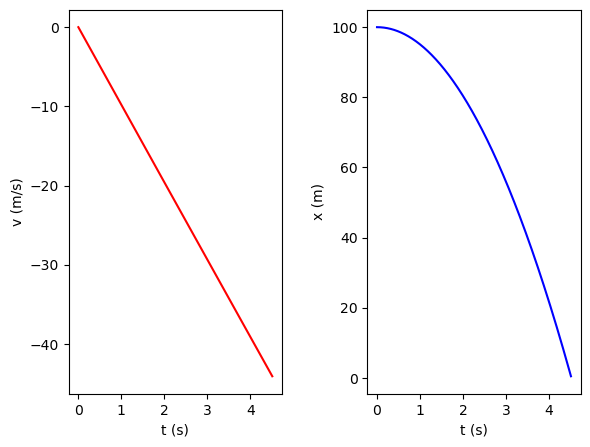

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# initiate the required variables / add additional ones if needed
# change the values if needed
N=1000          #replace this by the value you need for your problem
dt = 1e-2       #replace this by the value you need for your problem
m = 0.0001       #mass of sphere
R = 0.0015      #radius of sphere
mu = 1.8e-5     #viscosity of air
h = 100.        #initial height
g = 9.813       #acceleration of gravity


i=0
t = 0*np.linspace(0,N,N+1)
v = 0*np.linspace(0,N,N+1)
x = 0*np.linspace(0,N,N+1)

# provide the initial conditions
x0 = h     #initial condition
v0 = 0     #initial condition
x[0]=x0
v[0]=v0

#define the function F/m
def force(x, v):
    force = -g - 6*mu*R*v/m      #replace this line with the actual F/m - expression
    return force

#compute the trajectory and velocity
while i < N:
    t[i+1] = (i+1)*dt
    v[i+1] = v[i] + force(x[i],v[i])*dt
    x[i+1] = x[i] + (v[i]+v[i+1])*dt/2.0
    if x[i+1]<0:
        break
    i = i+1

Nmax = i

#interpolate time to estimate the time of impact with the ground (use linear interpolation)
T = (x[i]*t[i+1]-x[i+1]*t[i])/(x[i]-x[i+1])

#print the last time before collision, the collision time and the first time after collision
#Note: everything after collision is meaningless: we did not incorprated any effect of hitting the ground
print('T = ',f"{T:.4}",'(s)')

#interpolate the velocity to find the velocity upon impact
v_col = v[i+1] + (v[i]-v[i+1])*(T-t[i+1])/(t[i]-t[i+1])
print('v at impact is: ',f"{v_col:.3}",' (m/s)')

# plot the results
plt.subplot(121)
plt.plot(t[:Nmax],v[:Nmax],'r-')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.subplot(122)
plt.plot(t[:Nmax],x[:Nmax],'b-')
plt.xlabel('t (s)')
plt.ylabel('x (m)')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# show the plots
plt.show()